In [ ]:
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de Instituto BME.

# Para cada ejercicio: 1) Entregad un fichero en ipython notebook (.ipynb) ejecutable en Colab, y 
# 2) cada notebook ha de incluir un comentario sobre el ejercicio y sus resultados.

# 9) Realiza un entrenamiento utilizando Keras Tuner para estimar el valor de cierre en bolsa de 
# apple dados los datos de cierre de facebook, apple y google de 5 días anteriores. 
# Varia las opciones que te permite Keras Tuner. Comenta los resultados en cuanto al tiempo y precisión.

# 10) Entrena también un modelo utilizando Auto-Keras. Se pueden elegir 
# distintas opciones para el problema dependiendo de como ordenemos los 
# datos (TimeSeriesForecaster, Structured Data Regression, Image regression…) 
# ¿Cúal piensas que es mejor y porqué?

# Intenta que el tiempo de entrenamiento sea el mismo que ha utilizado 
# el Keras Tuner. Compara el rendimiento del modelo obtenido por Auto-Keras 
# con el del modelo encontrado por Keras Tuner.

# Es parecido al ej 6 puesto por Valero
# en los modulos de CNN y RNN 
# asi que tomo lo que presente en ese ejercicio y le meto el Keras Tuner
# Y Autokeras


In [2]:
# 0
# De mi ej 6 de los problemas de modulos de CNN y RNN . NADA NUEVO.
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, LSTM, GRU, MaxPooling1D, Conv2D, MaxPooling2D, Dropout, Bidirectional, Reshape, Activation

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

def datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model):
    salida=np.zeros((17))
    #trainableParams
    salida[0] = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
    #nonTrainableParams
    salida[1] = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
    #totalParams
    salida[2] = salida[0] + salida[1]
    
    #Train
    score = model.evaluate(x_train, t_train)
    salida[3] = score[0]
    salida[4] = score[1]
    y_hat = model.predict(x_train)
    # El  error de la predicion en train
    salida[5] = np.mean(abs(y_hat[:,0]-t_train))
    # La media de error en la prediccion en train 
    salida[6] =np.mean(np.abs(t_train))
    
    #Test
    score = model.evaluate(x_test, t_test)
    salida[7] = score[0]
    salida[8] = score[1]
    y_hat_test = model.predict(x_test)
    # El  error de la predicion en test
    salida[9] = np.mean(abs(y_hat_test[:,0]-t_test))
    # La media de error en la prediccion en test
    salida[10] = np.mean(np.abs(t_test))
    
    # numero de datos de entrada en train
    salida[11] = x_train.shape[0]
    #dimensiones de la entrada
    salida[12] =len(x_train.shape)
    # valor de la dimension 1 de la entrada
    if salida[12] >= 1:
        salida[13] = x_train.shape[0]
    # valor de la dimension 2 de la entrada
    if salida[12] >= 2:
        salida[14] = x_train.shape[1]
    # valor de la dimension 3 de la entrada
    if salida[12] >= 3:
        salida[15] = x_train.shape[2]
    # valor de la dimension 4 de la entrada
    if salida[12] >= 4:
        salida[16] = x_train.shape[3]
    
    print(len(salida))
    
    import pandas as pd 
    df = pd.read_csv ('metricas.csv', index_col=0) 
    print(df.shape)
    df[model_title] = salida
    df.to_csv('metricas.csv') 

    return salida, df

def sacar_close_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    
    
    dd_amzn = pd.read_csv("amzn.us.txt", delimiter=",")
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    dd_fb = pd.read_csv("fb.us.txt", delimiter=",")
    dd_aapl = pd.read_csv("aapl.us.txt", delimiter=",")
    dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
    
    
    amzn_op = dd_amzn['Close'].values
    msft_op = dd_msft['Close'].values
    fb_op = dd_fb['Close'].values
    aapl_op = dd_aapl['Close'].values
    googl_op = dd_googl['Close'].values
    
    print(amzn_op.shape)
    print(msft_op.shape)
    print(fb_op.shape)
    print(aapl_op.shape)
    print(googl_op.shape)
    
    # Como no coinciden en el tiempo los 5 valores me cojo solo los que coinciden
    # Primero me los ordeno teniendo en cuenta la fecha
    aa = dd_amzn['Date'].values #
    amzn_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        amzn_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #


    aa = dd_msft['Date'].values #
    msft_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        msft_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_fb['Date'].values #
    fb_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_aapl['Date'].values #
    aapl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        aapl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_googl['Date'].values #
    googl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10)) 
    
    
    # Los ploteo y veo que hay un tramo en el coinciden las fechas
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax1.plot(amzn_indice,amzn_op, label='amzn_indice,amzn_op')
    ax1.plot(msft_indice,msft_op, label='msft_indice,msft_opp')
    ax1.plot(fb_indice,fb_op, label='fb_indice,fb_op')
    ax1.plot(aapl_indice,aapl_op, label='aapl_indice,aapl_op')
    ax1.plot(googl_indice,googl_op, label='googl_indice,googl_op')
    ax1.legend()
    
    # Me quedo solo las fechas que coinciden
    indices = set(amzn_indice) & set(msft_indice) & set(fb_indice) & set(aapl_indice) & set(aapl_indice)

    ii = np.in1d(amzn_indice,list(indices))
    data_amzn = amzn_op[ii]
    ii = np.in1d(msft_indice,list(indices))
    data_msft = msft_op[ii]
    ii = np.in1d(fb_indice,list(indices))
    data_fb = fb_op[ii]
    ii = np.in1d(aapl_indice,list(indices))
    data_aapl = aapl_op[ii]
    ii = np.in1d(googl_indice,list(indices))
    data_googl = googl_op[ii]



    # Los ploteo y ahora síí coinciden en todo el tramo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax2.plot(data_amzn, label='data_amzn')
    ax2.plot(data_msft, label='data_msft')
    ax2.plot(data_fb, label='data_fb')
    ax2.plot(data_aapl, label='data_aapl')
    ax2.plot(data_googl, label='data_googl')
    ax2.legend()
    
    # Los coloco todos juntos en un dataset
    DAT = np.zeros((data_googl.shape[0],5))
    DAT[:,1] = data_amzn
    DAT[:,3] = data_msft
    DAT[:,2] = data_fb
    DAT[:,0] = data_aapl
    DAT[:,4] = data_googl

    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax3.plot(DAT[:,0], label='data_aapl')
    ax3.plot(DAT[:,1], label='data_amzn')
    ax3.plot(DAT[:,2], label='data_fb')
    ax3.plot(DAT[:,3], label='data_msft')
    ax3.plot(DAT[:,4], label='data_googl')
    ax3.legend()
    
    #normalizo de 0 a 1.
    DAT[:,0] = DAT[:,0]/DAT[:,0].max()
    DAT[:,1] = DAT[:,1]/DAT[:,1].max()
    DAT[:,2] = DAT[:,2]/DAT[:,2].max()
    DAT[:,3] = DAT[:,3]/DAT[:,3].max()
    DAT[:,4] = DAT[:,4]/DAT[:,4].max()
    
    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax4.plot(DAT[:,0], label='data_aapl')
    ax4.plot(DAT[:,1], label='data_amzn')
    ax4.plot(DAT[:,2], label='data_fb')
    ax4.plot(DAT[:,3], label='data_msft')
    ax4.plot(DAT[:,4], label='data_googl')
    ax4.legend()

    
    return DAT

def sacar_close_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    
    
    dd_amzn = pd.read_csv("amzn.us.txt", delimiter=",")
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    dd_fb = pd.read_csv("fb.us.txt", delimiter=",")
    dd_aapl = pd.read_csv("aapl.us.txt", delimiter=",")
    dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
    
    
    amzn_op = dd_amzn['Close'].values
    msft_op = dd_msft['Close'].values
    fb_op = dd_fb['Close'].values
    aapl_op = dd_aapl['Close'].values
    googl_op = dd_googl['Close'].values
    
    print(amzn_op.shape)
    print(msft_op.shape)
    print(fb_op.shape)
    print(aapl_op.shape)
    print(googl_op.shape)
    
    # Como no coinciden en el tiempo los 5 valores me cojo solo los que coinciden
    # Primero me los ordeno teniendo en cuenta la fecha
    aa = dd_amzn['Date'].values #
    amzn_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        amzn_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #


    aa = dd_msft['Date'].values #
    msft_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        msft_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_fb['Date'].values #
    fb_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_aapl['Date'].values #
    aapl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        aapl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_googl['Date'].values #
    googl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10)) 
    
    
    # Los ploteo y veo que hay un tramo en el coinciden las fechas
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax1.plot(amzn_indice,amzn_op, label='amzn_indice,amzn_op')
    ax1.plot(msft_indice,msft_op, label='msft_indice,msft_opp')
    ax1.plot(fb_indice,fb_op, label='fb_indice,fb_op')
    ax1.plot(aapl_indice,aapl_op, label='aapl_indice,aapl_op')
    ax1.plot(googl_indice,googl_op, label='googl_indice,googl_op')
    ax1.legend()
    
    # Me quedo solo las fechas que coinciden
    indices = set(amzn_indice) & set(msft_indice) & set(fb_indice) & set(aapl_indice) & set(aapl_indice)

    ii = np.in1d(amzn_indice,list(indices))
    data_amzn = amzn_op[ii]
    ii = np.in1d(msft_indice,list(indices))
    data_msft = msft_op[ii]
    ii = np.in1d(fb_indice,list(indices))
    data_fb = fb_op[ii]
    ii = np.in1d(aapl_indice,list(indices))
    data_aapl = aapl_op[ii]
    ii = np.in1d(googl_indice,list(indices))
    data_googl = googl_op[ii]



    # Los ploteo y ahora síí coinciden en todo el tramo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax2.plot(data_amzn, label='data_amzn')
    ax2.plot(data_msft, label='data_msft')
    ax2.plot(data_fb, label='data_fb')
    ax2.plot(data_aapl, label='data_aapl')
    ax2.plot(data_googl, label='data_googl')
    ax2.legend()
    
    # Los coloco todos juntos en un dataset
    DAT = np.zeros((data_googl.shape[0],5))
    DAT[:,1] = data_amzn
    DAT[:,3] = data_msft
    DAT[:,2] = data_fb
    DAT[:,0] = data_aapl
    DAT[:,4] = data_googl

    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax3.plot(DAT[:,3], label='data_msft')
    ax3.plot(DAT[:,1], label='data_amzn')
    ax3.plot(DAT[:,2], label='data_fb')
    ax3.plot(DAT[:,0], label='data_aapl')
    ax3.plot(DAT[:,4], label='data_googl')
    ax3.legend()
    

    # Hacemos el log y la rentabilidad para que no haya correlacion entre los valores y 
    # para remover la heterocedasticidad.
    #Aplico el retorno logaritmico
    DAT_1 = np.diff(np.log(DAT),axis=0)
    #DAT_1[:,0] = np.diff(np.log(DAT[:,0]),axis=0)
    #DAT_1[:,1] = np.diff(np.log(DAT[:,1]),axis=0)
    #DAT_1[:,2] = np.diff(np.log(DAT[:,2]),axis=0)
    #DAT_1[:,3] = np.diff(np.log(DAT[:,3]),axis=0)
    #DAT_1[:,4] = np.diff(np.log(DAT[:,4]),axis=0)
    
    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax4.plot(DAT_1[:,3], label='data_msft')
    ax4.plot(DAT_1[:,1], label='data_amzn')
    ax4.plot(DAT_1[:,2], label='data_fb')
    ax4.plot(DAT_1[:,0], label='data_aapl')
    ax4.plot(DAT_1[:,4], label='data_googl')
    ax4.legend()
    
    return DAT_1

def Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG,DAT_1):
    # Reordeno el dataset para hacer bloques de LAG dias
    #LAG = 11
    DAT_TS = np.zeros((DAT_1.shape[0]-LAG,LAG,DAT_1.shape[1]))

    for ii in range(0,DAT_1.shape[0]-LAG):
        #print(DAT_TS.shape)
        #print(DAT_1.shape)
        DAT_TS[ii,:,:] = DAT_1[ii:ii+LAG,:]
    # Tengo (#muestras,#longitud,#variables)

    #Separaro todo el dataset en los datos de apertura de 10 días anteriores para estimar el valor del día
    #actual
    #Ntr = np.floor(DAT_TS.shape[0]/2)
    Ntr = np.floor(DAT_TS.shape[0])
    data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]

    Y_target = 0
    data_y = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]

    #hago el split de train y test
    from sklearn.model_selection import train_test_split
    x_train, x_test, t_train, t_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)
    return x_train, x_test, t_train, t_test

# Entiendo que "conjunto de datos reordenando los datos." significa aplicar 
# la funcion que he creado reshape_para_trabajar_conv2D
def reshape_para_trabajar_conv2D (x_train,x_test):
    # Modifico las dimensiones para poder usar convoluciones 2D
    # Para eso incluyo una dimension de canales al final
    x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
    x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
    return x_train, x_test

# Evaluamos el modelo segun los datos mas generales para evaluarlo
# PARA USARLO PARA EL TFM; COMPLETO CON accuracy Y val_accuracy AUNQUE NO ES EJERCICIO
# DE CLASIFICAION Y VALERO DIJO QUE accuracy SOLO LO VIERAMOS EN EJERCICIOS DE CLASIFICION

def graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist):
    import matplotlib.pyplot as plt
    %matplotlib inline
    #Train
    score = model.evaluate(x_train, t_train)
    print('SCORE DE TRAIN:')
    print(score)

    #Test
    print('SCORE DE TEST:')
    score_1 = model.evaluate(x_test, t_test)
    print(score_1)

    n_epochs = len(hist.history['loss'])
    hd = hist.history
    epochs = range(1, n_epochs+1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, hd['accuracy'], "r", label="train")
    plt.plot(epochs, hd['val_accuracy'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()
    plt.show()
    return score, score_1

# Cree esta funcion segun lo que Valero son ensenaba en clase
# PARA USARLO PARA EL TFM;

def ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model):
    
    #ESTUDIO GRAFICO DE RESULTADOS PARA EVALUAR
    # Evaluamos el modelo en train
    score = model.evaluate(x_train, t_train, verbose=0)
    print(f'Evaluamos el modelo en train_score: {score}')

    # Predecimos con los datos de train
    y_hat = model.predict(x_train)
    print(f'Predecimos con los datos de train: {np.mean(abs(y_hat[:,0]-t_train))}')
    print(f'Predecimos con los datos de train_cantidad/dimensiones de datos:{y_hat.shape}')
    print(f' La media de error en la prediccion en entrenamiento es: {np.mean(np.abs(t_train))}')

    # Predecimos con los datos de test
    y_hat_test = model.predict(x_test)
    print(f' El  error de la predicion usando datos de test es de : {np.mean(abs(y_hat_test[:,0]-t_test))}')
    print(f' La media de error en la prediccion en test es: {np.mean(np.abs(t_test))}')

    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(20, 10)) 
    # Mostramos las predicciones de entrenamiento
    print(f'Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:')

    #plt.figure()
    ax1.plot(y_hat[:,0], label='y_hat[:,0] datos')    
    ax1.plot(t_train, label='t_train predicciones')
    ax1.grid(True)
    #ax1.xlabel("valores")
    #ax1.ylabel("nuero de dato ordinalmente")
    ax1.legend()

    #plt.figure()
    ax2.plot(t_train,y_hat[:,0],'.', label='t_train VSy_hat[:,0],')
    ax2.grid(True)
    #ax2.xlabel("t_train")
    #ax2.ylabel("y_hat[:,0],")
    ax2.legend()

    # Mostramos las predicciones de test
    ax3.plot(y_hat_test[:,0], label='y_hat_test[:,0] datos')
    ax3.plot(t_test, label=' t_testpredicciones')
    ax3.grid(True)
    #ax3.xlabel("valores")
    #ax3.ylabel("nuero de dato ordinalmente")
    ax3.legend()

    ax4.plot(t_test,y_hat_test[:,0],'.', label='t_test VS y_hat_test[:,0]')
    ax4.grid(True)
    #ax4.xlabel("t_test")
    #ax4.ylabel("y_hat_test[:,0]")
    ax4.legend()

    
    ax5.plot(model.weights[0].numpy().reshape(-1),'o-',label="Pesos neurona primera capa")
    ax5.grid(True)
    #ax5.xlabel("numero de la neurona ordinalmente")
    #ax5.ylabel("peso de la neurona")
    #ax5.title("Pesos neurona primera capa")
    ax5.legend()
    
    return

def activo_caso_1(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    model = Sequential()
    model.add(Conv2D(10, 3, input_shape=x_train.shape[1:], padding='same'))
    #model.add(Conv2D(10, 3, input_shape=(10,5,), padding='same'))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2))
    model.add(Reshape((5*2,10))) #https://github.com/keras-team/keras/issues/4172
    model.add(LSTM(5,return_sequences=True))
    #model.add(Bidirectional(GRU(20), input_shape=(10,1), merge_mode="ave"))
    model.add(GRU(5))
    model.add(Flatten())
    model.add(Dense(1))


    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

def activo_caso_2(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    

    model = Sequential()
    model.add(Conv2D(10,3, input_shape=(x_train.shape[1:]),padding='same'))
    model.add(Reshape((10*5,10)))
    model.add(GRU(5,return_sequences=True))
    model.add(LSTM(5))
    model.add(Flatten())
    model.add(Dense(1))



    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

def activo_caso_3(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    

    # Otra posibilidad 2 convolucionales 2D y 2 densas
    model = Sequential()
    model.add(Conv2D(5, 3, input_shape=x_train.shape[1:], padding='same'))
    model.add(Conv2D(5, 3, padding='valid'))
    model.add(Flatten())
    model.add(Dense(3))
    model.add(Dense(1))



    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

def activo_caso_4(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    # modelo con 3 capas de Conv2D y con mas cositinas y una densa al final
    model = Sequential()
    #Vamos añadiendo capas
    model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=x_train.shape[1:], padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #model.add(MaxPooling2D(2))
    model.add(Conv2D(3, kernel_size=5, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPooling2D())
    model.add(Conv2D(3, kernel_size=3, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(MaxPooling2D(2))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1))




    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

2.12.0


In [40]:
# 1. Keras Tuner; DEFINIR MODELO CON ALGUNOS HIPERPARAMETROS PARA VER QUE LOS SE APLICAR
# tomo como ejemplo el caso 4 CON REG LOGARITMICA DE LOS QUE PRESENTE EN EJ 6 DE EJERCICIOS DE CNN Y RNN
def model_builder_4(hp):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    hp_learning_rate = hp.Choice('learning_rate', values = [1.0, 0.1, 0.01, 0.001]) # usado
    hp_num_units_cap_1 = hp.Choice('num_units', values = [6, 8, 10, 12]) # usado
    # hp_drop_val_2 = hp.Choice('num_units', values = [0.2, 0.3, 0.4, 0.5]) # no usado pq no es mandatorio y tarda mucho ya
    hp_num_units_cap_2 = hp.Choice('num_units', values = [2, 3, 4, 5])  # usado
    hp_num_units_cap_3 = hp.Choice('num_units', values = [2, 3, 4, 5]) # usado
    # hp_act = hp.Choice('activation', values = ['sigmoid', 'relu']) # no usado pq no es mandatorio y tarda mucho ya

    # modelo con 3 capas de Conv2D y con mas cositinas y una densa al final
    model = Sequential()
    #Vamos añadiendo capas
    model.add(Conv2D(hp_num_units_cap_1, kernel_size=3, activation='relu', input_shape=x_train.shape[1:], padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #model.add(MaxPooling2D(2))
    model.add(Conv2D(hp_num_units_cap_2, kernel_size=5, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPooling2D())
    model.add(Conv2D(hp_num_units_cap_3, kernel_size=3, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(MaxPooling2D(2))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1))

    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss = 'mean_squared_error')
    # model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    return model



(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-2-9af3fbeecda0>:410: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-2-9af3fbeecda0>:413: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

(921, 4, 5, 1) (454, 4, 5, 1) (921,) (454,)
Search space summary
Default search space size: 2
learning_rate (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001], 'ordered': True}
num_units (Choice)
{'default': 6, 'conditions': [], 'values': [6, 8, 10, 12], 'ordered': True}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 5, 8)           80        
                                                                 
 batch_normalization (BatchN  (None, 4, 5, 8)          32        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 4, 5, 8)           0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 5, 8)           1608      
                     

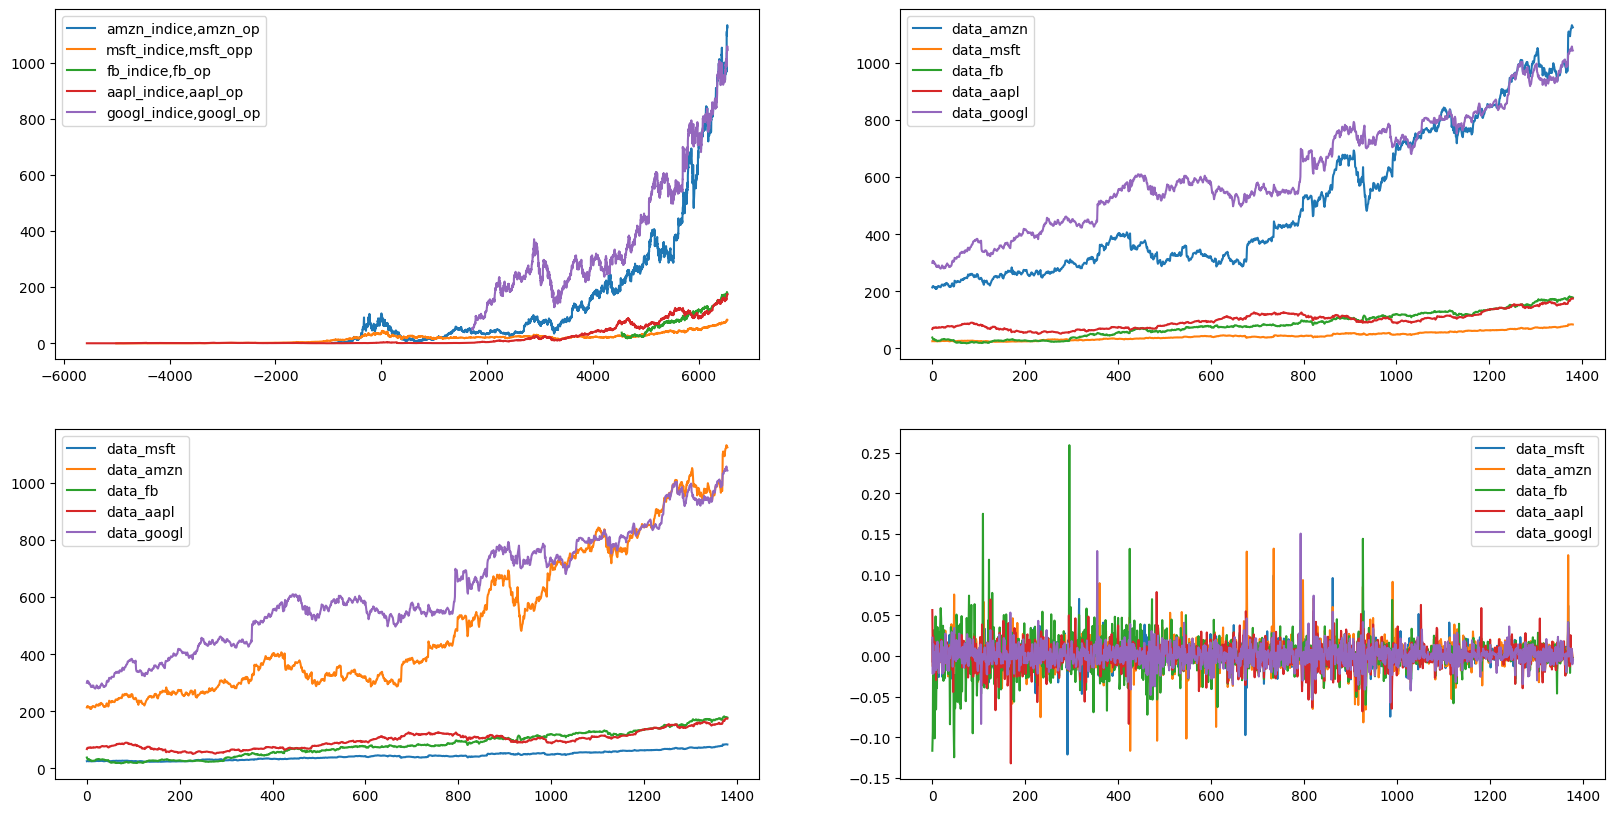

In [100]:
# 2. Keras Tuner; DARLE DATOS E INICIALIZARLO. LUEGO HACER PREDICCION

# 2.1 CARGAR DATOS
DAT = sacar_close_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG () # los cambio de open a clsoe
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=5,DAT_1=DAT) # he cambiado que calcule apple y con los close 
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

# 2.2 LO QUE SE NECESITA PARA INICIALIZAR EL KERAS TUNER A UN MODELO DEFINIDO EN AL CELDA ANTERIOR
!pip install -q -U keras-tuner
import kerastuner as kt

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil

# Lo siguiente es crear un tuner para hacer el ajuste de los hiperparámetros. Existen distintos tipos:
# RandomSearch
# Hyperband
# BayesianOptimization
# Sklearn

# Lo más fácil es hacer una búsqueda aleatoria con RandomSearch . Al crear el tuner hay que
# especificar:
# El hipermodelo.
# La variable a optimizar.
# El número total de pruebas.
# El número de ejecuciones por prueba.
# HE TOMADO EL RandomSearch POR TOMAR UNO
tuner = kt.RandomSearch(model_builder_4,objective='val_loss',max_trials=10,executions_per_trial=3,directory='my_dir',project_name='Ej9_R')
#tuner = kt.Hyperband(model_builder_3,objective='val_acc',max_epochs=10,factor=3,directory='my_dir',project_name='Ej9_H')
tuner.search_space_summary()

# Y lanzamos la búsqueda:
# a = tuner.search(x_train, t_train, epochs=1,validation_data=(x_test, t_test))
# tuner.search(x_train, t_train, epochs=100, verbose=1, validation_split = 0.1)
tuner.search(x_train, t_train, epochs=100, validation_split = 0.1)
# hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000

# 2.3 EVALUAR EL MODELO
# Acceso al mejor modelo. Hay que tener en cuenta que ya está entrenado, y siempre es mejor
# reentrenarlo con todos los datos
best_model = tuner.get_best_models()[0]
best_model.evaluate(x_train, t_train)
# Resumen de los resultados:
tuner.results_summary()

# 2.4 Obtenemos los parámetros del mejor modelo y lo reentrenamos:
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000


Trial 5 Complete [00h 00m 20s]
val_loss: 0.00021054693206679076

Best val_loss So Far: 0.00020881550153717399
Total elapsed time: 00h 02m 19s
Epoch 1/20
29/29 [==============================] - 19s 150ms/step - loss: 6.1355e-04 - mean_squared_error: 6.1355e-04 - val_loss: 2.6694e-04 - val_mean_squared_error: 2.6694e-04
Epoch 2/20
29/29 [==============================] - 1s 26ms/step - loss: 2.7215e-04 - mean_squared_error: 2.7215e-04 - val_loss: 2.1363e-04 - val_mean_squared_error: 2.1363e-04
Epoch 3/20
29/29 [==============================] - 1s 22ms/step - loss: 2.5569e-04 - mean_squared_error: 2.5569e-04 - val_loss: 2.0962e-04 - val_mean_squared_error: 2.0962e-04
Epoch 4/20
29/29 [==============================] - 1s 21ms/step - loss: 2.5668e-04 - mean_squared_error: 2.5668e-04 - val_loss: 2.0940e-04 - val_mean_squared_error: 2.0940e-04
Epoch 5/20
29/29 [==============================] - 1s 25ms/step - loss: 2.5727e-04 - mean_squared_error: 2.5727e-04 - val_loss: 2.0972e-04 - val_me

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 5)]            0         
                                                                 
 bidirectional (Bidirectiona  (None, 5, 10)            440       
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 10)               640       
 nal)                                                            
                                                                 
 regression_head_1 (Dense)   (None, 1)                 11        
                                                                 
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________
(920, 5, 5, 1) (454, 5, 5, 1) (920,) (454,)
(454, 5, 5, 1)


<ipython-input-2-9af3fbeecda0>:410: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-2-9af3fbeecda0>:413: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

15/15 [==============================] - 2s 10ms/step


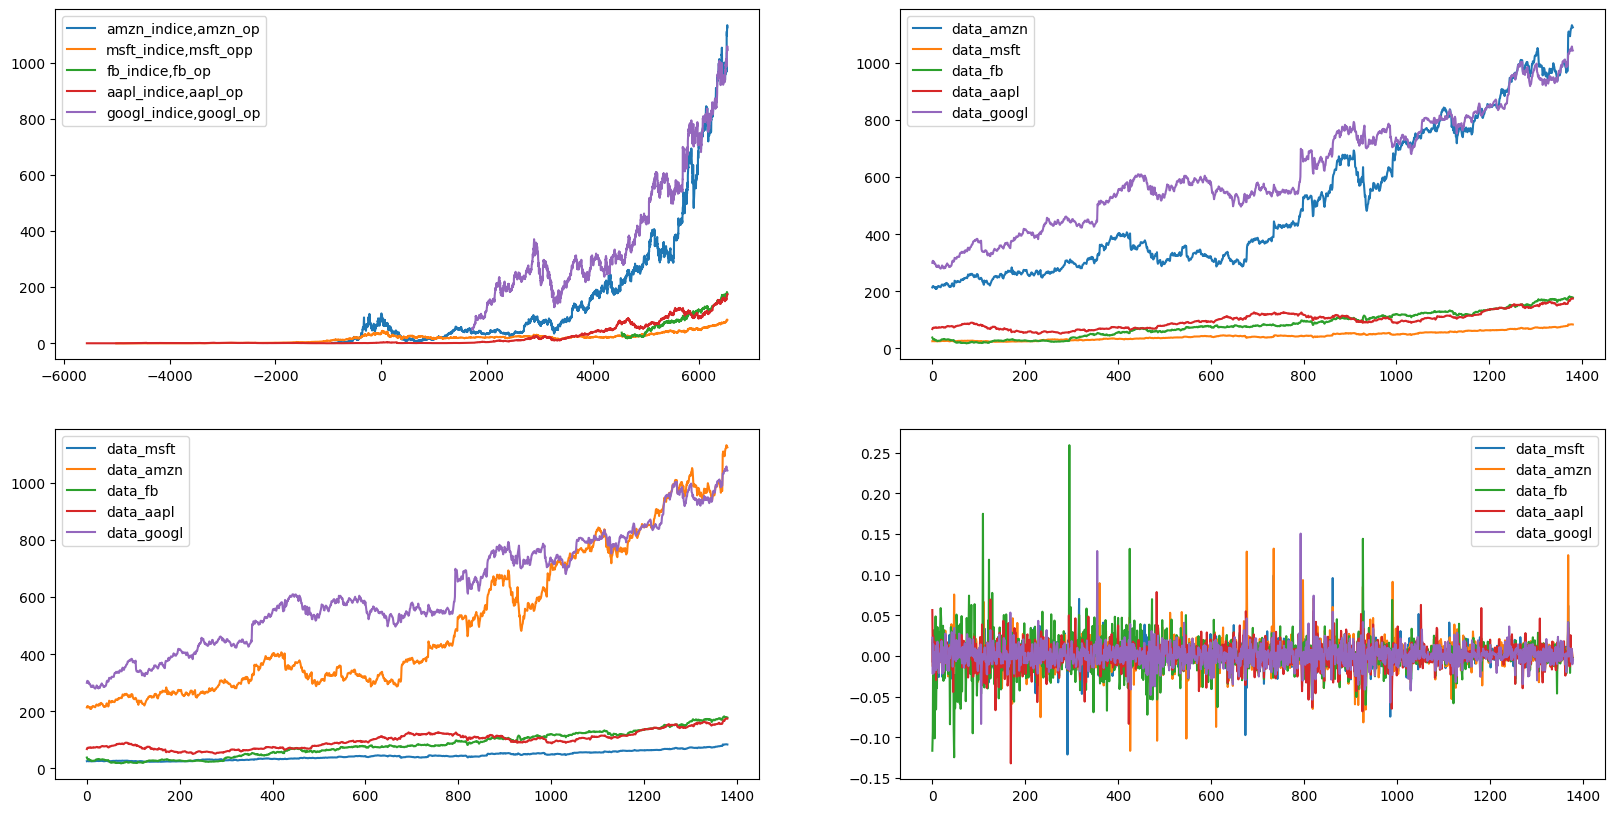

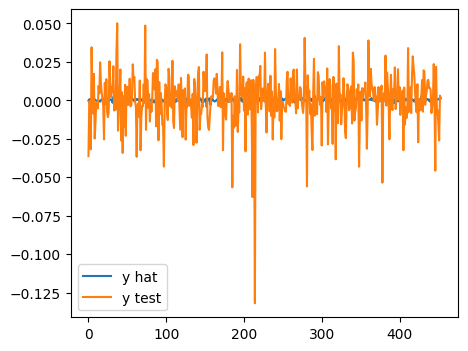

In [121]:
# 3. Ej_10
# Auto-Keras
# tomo como referencia el programa que nos ha dado Valero de Times Forecast pq 
# entiendo que es lo que estamos haciendo en este ejercicio de los 3 que nos ha dado
# AutoML_Autokeras_example es de un clasificador mninst
# AutoML_Autokeras_example_super_short es de un clasificador mninst
# AutoML_AutoKeras_stockmarket_TimesForecaster para series temporales
# En los apuntes dice que el tipo de problema se necesita senalas en el autokeras


# 3.1 INICIALIZAR EL AUTOKERAS 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Instalamos Autokeras (en caso que no lo tengamos ya instalado)
!pip install autokeras
!pip install git+https://github.com/keras-team/keras-tuner.git@1.1.0
import autokeras as ak

# 3.2 CARGAR LA DATA PARA ENTREANAR EL AUTOKERAS (LIO QUE EL TimesForecaster HACE EL LAS VENTANAS)
DAT = sacar_close_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG () # los cambio de open a clsoe
# x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=5,DAT_1=DAT) 
# he cambiado que calcule apple y con los close 



# Usamos el modelo TimeSeriesForecaster de autokeras.
# Este modelo nos permite usar el ''lookback'' (LAG), el tamaño de la ventana que vamos a utilizar. 
# Por lo que NO tenemos que reordenar los datos en datos "enventanados". 
# Luego, para poder usarlo como modelo de Keras, SÍ tendremos que reordenarlos.
# Vamos a ponerle un máximmo de 5 intentos y 20 épocas de entrenamiento (para ahorrar tiempo).
# El objetivo va a ser el loss en valdiación.

# LOS DATOS HAN DE ESTAR SIN VENTANARLOS

# le pongo UNA VENTANA DE 5 EN LOOKBACK PARA QUE SEA COMO EN EL EJERCIO 9
clf = ak.TimeseriesForecaster(lookback = 5, max_trials=5, 
                              directory="resultados", 
                              objective="val_loss",  
                              overwrite=True)


# Ya que el que hacer la ventana es el AutoKeras, entiendo que las Xs son el 
# DAT y las Ys han de ser 6 posiciones adelantadas el DAS.iloc[:0] ya que 0 es apple.
# Y luego hacer el train_test_split

data_x = DAT[:-4]
data_y = np.asarray(pd.DataFrame(DAT[:,0]).shift(-4))[:-4]
print(data_x.shape, data_y.shape)

#hago el split de train y test
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)
#x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size=0.33, random_state=12)

# x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test) #?????????????????????????????????????????????????????????????????????
# Buscamos el modelo con Autokeras
x_train_AK = x_train
y_train_AK = t_train
x_val_AK = x_test
y_val_AK = t_test

clf.fit(pd.DataFrame(x_train_AK), 
        pd.DataFrame(y_train_AK), 
        validation_data=(pd.DataFrame(x_val_AK), 
                         pd.DataFrame(y_val_AK)), 
        epochs=20)

# Exportamos el mejor modelo a modelo de Keras
mod = clf.export_model()
mod.summary()

# 3.3 EVALUAMOS EL MODELO CON LOS DATOS QUE TENGO QUE HACER VENTANAS ANTES

# Predecir
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=6,DAT_1=DAT) 
# he cambiado que calcule apple y con los close 

x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)
X_test = x_test
Y_test = t_test

print(X_test.shape)
print(Y_test.shape)
# Predecir con el modelo
Y_hat = mod.predict(X_test)

# Resultados
plt.figure(figsize=(5, 4))

plt.plot(Y_hat,label = 'y hat')
plt.plot(Y_test,label = 'y test')

plt.legend()


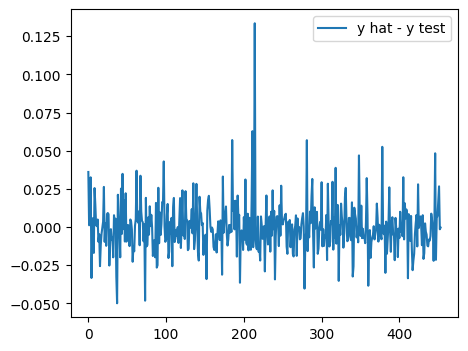

In [129]:
# Resultados( difenecia entre el retorno estiamdo y el optenido)
a = Y_hat[:,0]-Y_test
plt.figure(figsize=(5, 4))
plt.plot(a,label = 'y hat - y test')

plt.legend()

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-2-9af3fbeecda0>:410: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-2-9af3fbeecda0>:413: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

ValueError: ignored

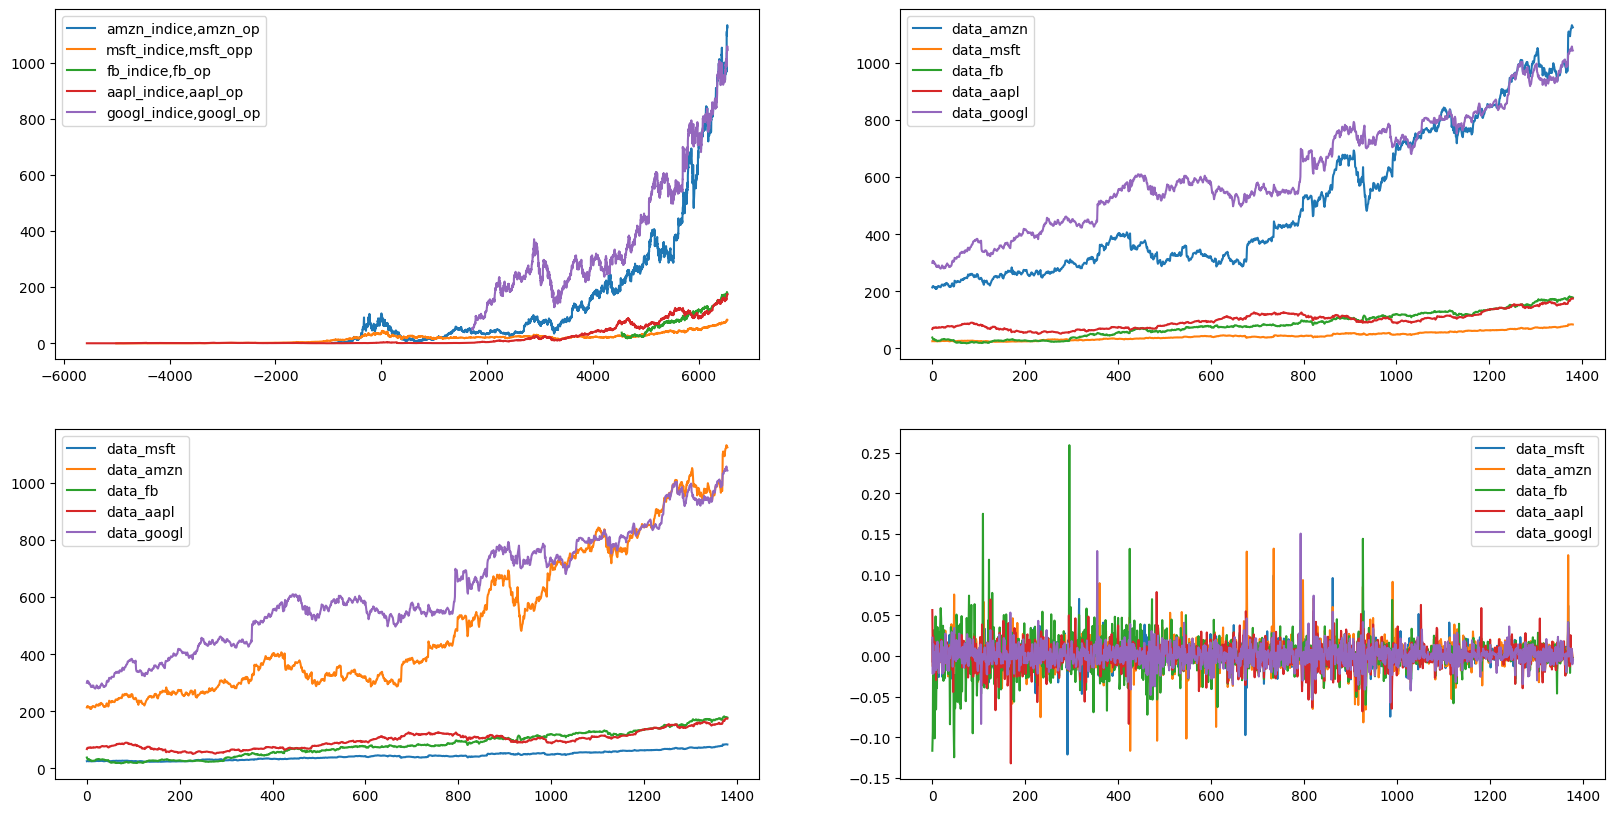

In [117]:
# # ¿Cúal piensas que es mejor y porqué?



# 3.5. VER SI USAMOS OTRO METODO DE AUTOKERAS
# pero como al red empieza con uNA convolucional, a lo mejor puedo usar una 
# otro tipo de Auto-Keras para dara un valor a partir de una seri.
# En https://autokeras.com/tutorial/overview/
# hay estos modelos
# Supported Tasks:
# Image Classification
# Image Regression
# Text Classification
# Text Regression
# Structured Data Classification
# Structured Data Regression# 
# Coming Soon: Time Series Forecasting, Object Detection, Image Segmentation.

# Ademas del TimeSeriesForecaster, veo que Image Regression 
# ( por emepezar por un COV2d el modelo)
#  y Structured Data Regression a lo mejor se pueden usar.


# Para https://autokeras.com/tutorial/image_regression/, hablan del mnist
# y luego habla de "using AutoModel instead of ImageRegressor. You can configure
# the ImageBlock for some high-level configurations, e.g., block_type for the 
# type of neural network to search, normalize for whether to do data normalization, 
# augment for whether to do data augmentation."
# Como ni los valores de las ventanas y la regresion logaritmica realmente no se pueden normalizar
# y ademas al usar el mnist como ejemplo, entiendo que no aplica pq es mas para clasificacion.

# Para https://autokeras.com/tutorial/structured_data_regression/, hablna del 
# fetch_california_housing; creo que este se podria intentar usar. pq
# puede entenderse como un problema de regresion parecido

# Si cojo como modelo el ejemplo de fetch_california_housing( ve celda mas abajo); 
# Los datos los queiere asi: ((18576, 8), (18576, 1), (2064, 8), (18576, 1))
# Y si le metos los datos en ventanas me da este error
# ValueError: Expect the data to StructuredDataInput to have shape (batch_size, num_features), but got input shape [32, 4, 5, 1].
# Asi que este este tipo de modelo structured_data_regression, no busca datos
# en batch,2D,1; con ventanas.

import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak

DAT = sacar_close_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=5,DAT_1=DAT) # he cambiado que calcule apple y con los close 
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)

# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)# le he puesto que busque en 10 modelos
# Feed the structured data regressor with training data.
reg.fit(x_train, t_train, validation_split=0.15, epochs=100)
# Exportamos el mejor modelo a modelo de Keras
mod = reg.export_model()
mod.summary()
# Predict with the best model.
predicted_y = reg.predict(x_test)
# Evaluate the best model with testing data.
print(reg.evaluate(x_test, t_test))


# EN CONCLUSION, ESO QUE EL ak.TimeseriesForecaster(lookback = QUE  HAGA LA VENTANA, ES UN INCORDIO



# Intenta que el tiempo de entrenamiento sea el mismo que ha utilizado 
# el Keras Tuner. Compara el rendimiento del modelo obtenido por Auto-Keras 
# con el del modelo encontrado por Keras Tuner.

# Pensando y pensando creo qyue lo que tiene sentido es usar el Autokeras 
# para que te de algunas redes o una red como incicio de resolver tu problema
# y eso aunque Valero dijo algo asi que en un articulo decia que solo data un 5%
# mejro performace que un aleatorio.
# # Y caundo tenga elegida una red/modelo, pues usamos el Keras Tuner para "optimizar"
# los hiperparametros y optener una red aceptable. El Keras Tuner me tarda mas de el 
# Auto keras aqunque en este notebook aparecen muchos menos modelos definidos por
# Autokeras que los que genero variando los hiperparametros con el Keras Tuner


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

import autokeras as ak

house_dataset = fetch_california_housing()
df = pd.DataFrame(
    np.concatenate(
        (house_dataset.data, house_dataset.target.reshape(-1, 1)), axis=1
    ),
    columns=house_dataset.feature_names + ["Price"],
)
train_size = int(df.shape[0] * 0.9)
df[:train_size].to_csv("train.csv", index=False)
df[train_size:].to_csv("eval.csv", index=False)
train_file_path = "train.csv"
test_file_path = "eval.csv"

# x_train as pandas.DataFrame, y_train as pandas.Series
x_train = pd.read_csv(train_file_path)
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("Price")
print(type(y_train))  # pandas.Series

# You can also use pandas.DataFrame for y_train.
y_train = pd.DataFrame(y_train)
print(type(y_train))  # pandas.DataFrame

# You can also use numpy.ndarray for x_train and y_train.
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
print(type(x_train))  # numpy.ndarray
print(type(y_train))  # numpy.ndarray

# Preparing testing data.
x_test = pd.read_csv(test_file_path)
y_test = x_test.pop("Price")

train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
# Feed the tensorflow Dataset to the regressor.
reg.fit(train_set, epochs=10)
# Predict with the best model.
predicted_y = reg.predict(test_set)
# Evaluate the best model with testing data.
print(reg.evaluate(test_set))

In [120]:
x_train.shape, y_train.shape, x_test.shape, y_train.shape


((18576, 8), (18576, 1), (2064, 8), (18576, 1))